In [1]:
%run ../__init__.py
%load_ext autoreload
%autoreload 2

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


## Validation annotations


In [2]:
# from source.datasets.imcpt.preprocessing.annotations import create_val_pairs

# root_path = "/mnt/sda/datasets/IMCPT"
# scenes = ["reichstag", "sacre_coeur", "st_peters_square"]

# create_val_pairs(root_path, scenes)

In [3]:
# from source.datasets.base.utils import from_pairs_annotations_csv

# from_pairs_annotations_csv(root_path, 'val_pairs.csv', 'val.csv')

## Test annotations

In [5]:
# from source.datasets.imcpt.preprocessing.annotations import create_test_calibration, create_test_pairs

# root_path = "/mnt/sda/datasets/IMCPT"
# scenes = ["british_museum", "florence_cathedral_side", "lincoln_memorial_statue", "milan_cathedral",
#           "mount_rushmore", "piazza_san_marco", "sagrada_familia", "st_pauls_cathedral"]

In [6]:
# create_test_calibration(root_path, scenes)

In [7]:
# create_test_pairs(root_path, scenes)

In [8]:
# from source.datasets.base.utils import from_pairs_annotations_csv

# from_pairs_annotations_csv(root_path, 'test_pairs.csv', 'test.csv')

## Pairs

In [13]:
from omegaconf import OmegaConf

from source.datasets.base.transforms import ImageDepthCalibFeaturesTFactory
from source.datasets.imcpt.dataset import IMCPTDataset
from torch.utils.data.dataloader import DataLoader


s = """
    csv_path: "/mnt/sda/datasets/IMCPT/val_pairs.csv"
    data_options:
      - 'image'
      - 'depth'
      - 'calib'

    transforms:
      grayscale:
      
      resize:      
        width: -1
        height: -1
        
      crop1:
        type: 'divisor_crop'
"""

dataset_config = OmegaConf.create(s)

item_transforms = ImageDepthCalibFeaturesTFactory(dataset_config.transforms, 16).create()
dataset = IMCPTDataset.from_config(dataset_config, "f_pydegensac/2k", item_transforms)
loader = DataLoader(dataset, 1)

_iter = loader.__iter__()

In [14]:
item = next(_iter)

In [15]:
image1_name = item[du.IMAGE_NAME1]
image2_name = item[du.IMAGE_NAME2]

image1 = item[du.IMAGE1]
image2 = item[du.IMAGE2]

depth1 = item[du.DEPTH1]
depth2 = item[du.DEPTH2]

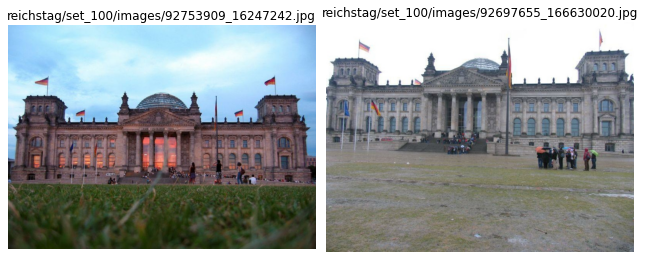

In [16]:
plot_figures({image1_name[0]: torch2cv(image1[0]), 
              image2_name[0]: torch2cv(image2[0])}, 1, 2, (9, 9))

In [17]:
from source.datasets.base.utils import RBTDataWrapper

rbt_data = RBTDataWrapper().init_from_batch(item, torch.device('cpu'))

In [18]:
from source.projective.rbt import warp_image_rbt

w_image2, vis_mask1 = warp_image_rbt(image2, rbt_data.swap(), 'im')
w_image1, vis_mask2 = warp_image_rbt(image1, rbt_data, 'im')

/opt/conda/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272168290/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:4004: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


In [19]:
idx = 0

cv_image1 = torch2cv(image1[idx])
cv_image2 = torch2cv(image2[idx])

cv_depth1 = torch2cv(depth1[idx], normalize=True, to_rgb=True)
cv_depth2 = torch2cv(depth2[idx], normalize=True, to_rgb=True)

cv_w_image1 = torch2cv(w_image1[idx])
cv_w_image2 = torch2cv(w_image2[idx])

cv_vis_mask1 = torch2cv(vis_mask1.float()[idx], to_rgb=True)
cv_vis_mask2 = torch2cv(vis_mask2.float()[idx], to_rgb=True)

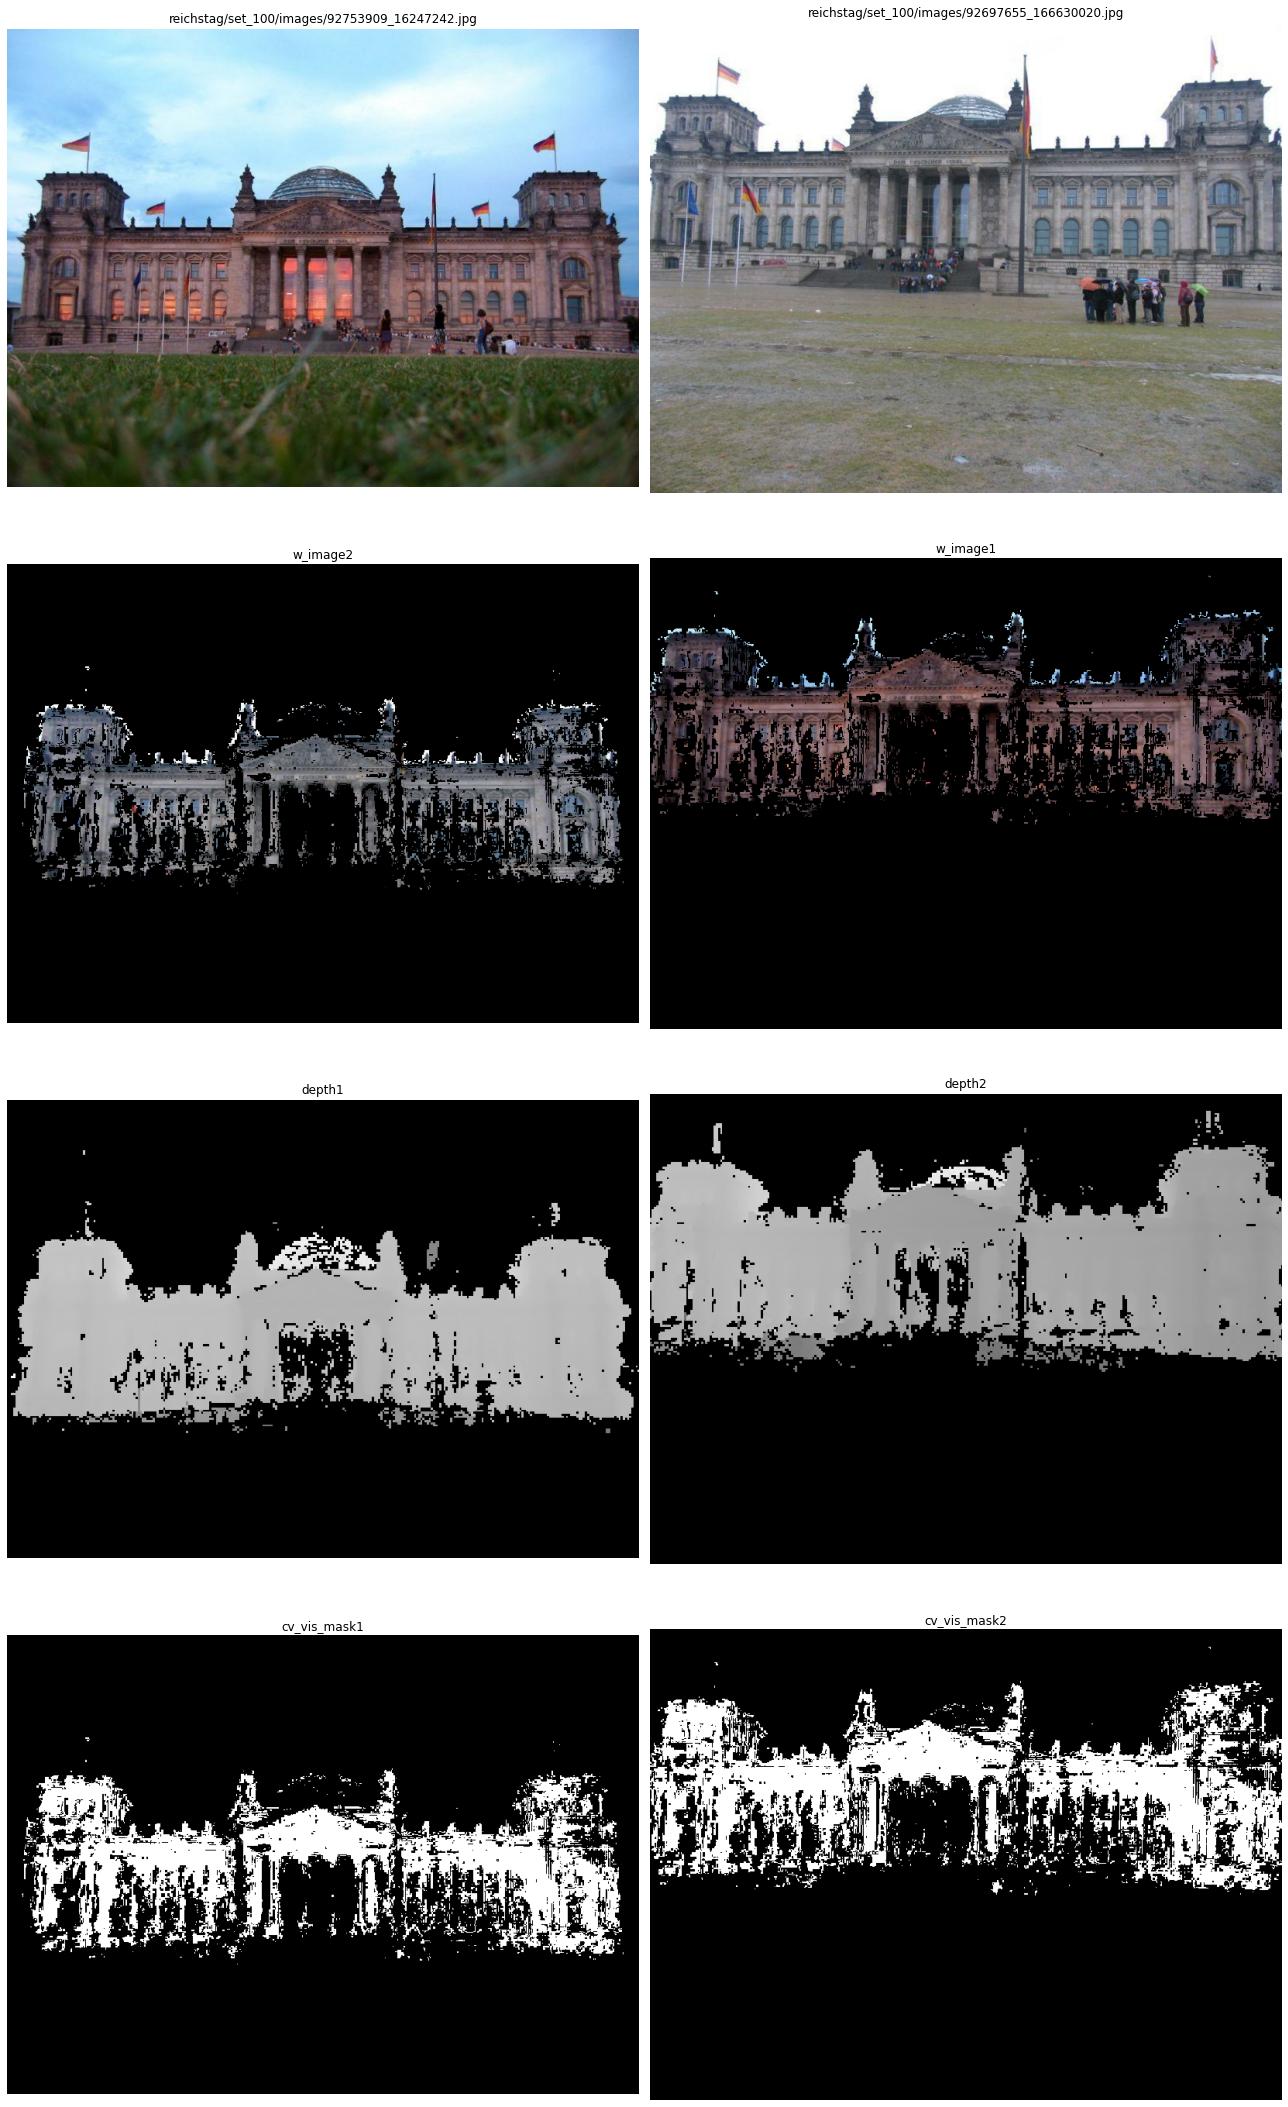

In [20]:
plot_figures({image1_name[idx]: cv_image1, image2_name[idx]: cv_image2,
              'w_image2': cv_w_image2, 'w_image1': cv_w_image1, 
              'depth1': cv_depth1, 'depth2': cv_depth2,
              'cv_vis_mask1': cv_vis_mask1, 'cv_vis_mask2': cv_vis_mask2}, 4, 2, (18, 30))

## Standalone

In [21]:
from omegaconf import OmegaConf

from source.datasets.base.transforms import ImageDepthCalibFeaturesTFactory
from source.datasets.imcpt.dataset import IMCPTDataset
from torch.utils.data.dataloader import DataLoader


s = """
    csv_path: "/mnt/sda/datasets/IMCPT/val.csv"
    data_options:
      - 'image'
    
    transforms:
      grayscale:
      
      resize:      
        width: -1
        height: -1
        
      crop1:
        type: 'divisor_crop'
"""

dataset_config = OmegaConf.create(s)

item_transforms = ImageDepthCalibFeaturesTFactory(dataset_config.transforms, 16).create()
dataset = IMCPTDataset.from_config(dataset_config, "f_pydegensac/2k", item_transforms)
loader = DataLoader(dataset, 1)

_iter = loader.__iter__()

In [22]:
item = next(_iter)

In [23]:
image1_name = item[du.IMAGE_NAME1]

image1 = item[du.IMAGE1]

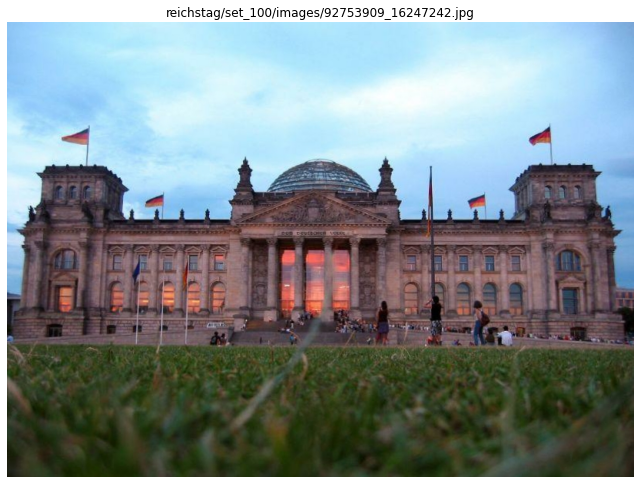

In [24]:
plot_figures({image1_name[0]: torch2cv(image1[0])}, 1, 1, (9, 9))